In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
held_out_B_data = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")


In [58]:
held_out_B_data

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998128,"{'@module': 'pymatgen.core.structure', '@class...",423959398,"{'@module': 'pymatgen.core.structure', '@class...",123103556,-265.489796,-6.637245,0.074200,-1.389153,"{'@module': 'pymatgen.core.structure', '@class...",-266.711243,-6.667781,0,0.077370
1,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998125,"{'@module': 'pymatgen.core.structure', '@class...",421466237,"{'@module': 'pymatgen.core.structure', '@class...",122979400,-265.627054,-6.640676,0.070768,-1.420044,"{'@module': 'pymatgen.core.structure', '@class...",-266.456848,-6.661421,1,0.076950
2,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998126,"{'@module': 'pymatgen.core.structure', '@class...",421466235,"{'@module': 'pymatgen.core.structure', '@class...",122979657,-265.542706,-6.638568,0.072877,-1.424778,"{'@module': 'pymatgen.core.structure', '@class...",-266.213867,-6.655347,2,0.076547
3,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998127,"{'@module': 'pymatgen.core.structure', '@class...",421466263,"{'@module': 'pymatgen.core.structure', '@class...",122979417,-265.631202,-6.640780,0.070665,-1.404994,"{'@module': 'pymatgen.core.structure', '@class...",-264.671021,-6.616776,3,0.077123
4,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998129,"{'@module': 'pymatgen.core.structure', '@class...",421466289,"{'@module': 'pymatgen.core.structure', '@class...",122979438,-265.628562,-6.640714,0.070731,-1.381979,"{'@module': 'pymatgen.core.structure', '@class...",-266.308624,-6.657716,4,0.077057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062436,"{'@module': 'pymatgen.core.structure', '@class...",421446419,"{'@module': 'pymatgen.core.structure', '@class...",122979607,-291.947011,-7.298675,0.083433,-1.855526,"{'@module': 'pymatgen.core.structure', '@class...",-289.953644,-7.248841,595,0.100901
596,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062439,"{'@module': 'pymatgen.core.structure', '@class...",421459053,"{'@module': 'pymatgen.core.structure', '@class...",122979241,-293.275698,-7.331892,0.050215,-1.358484,"{'@module': 'pymatgen.core.structure', '@class...",-290.115479,-7.252887,596,0.078920
597,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062435,"{'@module': 'pymatgen.core.structure', '@class...",421464614,"{'@module': 'pymatgen.core.structure', '@class...",122979281,-291.822920,-7.295573,0.086535,-1.938487,"{'@module': 'pymatgen.core.structure', '@class...",-291.638702,-7.290968,597,0.100350
598,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062438,"{'@module': 'pymatgen.core.structure', '@class...",421446230,"{'@module': 'pymatgen.core.structure', '@class...",122979130,-292.317225,-7.307931,0.074177,-1.890348,"{'@module': 'pymatgen.core.structure', '@class...",-292.125397,-7.303135,598,0.089636


In [59]:
e3nn_ensemble = np.load("e3nn_mean_pred.npy")
CGCNN_ensemble = np.load("CGCNN_mean_pred.npy")

In [60]:
held_out_B_data["e3nn_ensemble"] = e3nn_ensemble
held_out_B_data["CGCNN_ensemble"] = CGCNN_ensemble

In [61]:
import json 
   
# Opening JSON file 
f = open('ABBO3_degeneracy.json',) 
   
# returns JSON object as  
# a dictionary 
degen = json.load(f) 
   
f.close() 

In [62]:
degen = np.asarray(list(degen['A8_B(4:4)_O24'].values()))

In [63]:
degen

array([ 6,  8, 24, 24,  6,  2])

In [67]:
formula_to_entropy_dft = {}
formula_to_entropy_CGCNN = {}
formula_to_entropy_e3nn = {}
formula_to_entropy_m3gnet = {}


formula_to_Prs_dft = {}
formula_to_Prs_CGCNN = {}
formula_to_Prs_e3nn = {}
formula_to_Prs_m3gnet = {}

formulas = set(held_out_B_data.formula)

In [74]:
T = 1300
kb = 0.0000861733326


def get_Prs(data,formula,energies):
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    probs = np.exp(-energies/(kb*T))*degen
    probs = probs / probs.sum()
    
    return probs[-1]
    
    
    
def get_entropy(data,formula,energies):
    
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    Bolzmann_terms = np.exp(-energies/(kb*T))
    weighted_probs = Bolzmann_terms*degen / np.sum(Bolzmann_terms*degen)
    
    entropy = 0
    entropy_norm = 0
    
    Z = np.sum(Bolzmann_terms*degen)
    
    uniform_Bolzmann_terms = np.ones(Bolzmann_terms.shape)
    uniform_Z = np.sum(degen*uniform_Bolzmann_terms)
    uniform_weighted_probs = uniform_Bolzmann_terms*degen / uniform_Z

    for i in range(Bolzmann_terms.shape[0]):
        entropy += weighted_probs[i]*np.log(Bolzmann_terms[i]/Z)
        
        entropy_norm += uniform_weighted_probs[i]*np.log(uniform_Bolzmann_terms[i]/uniform_Z)

    return entropy/entropy_norm

In [75]:
for formula in formulas:
    formula_to_entropy_dft[formula] = get_entropy(held_out_B_data.copy(),formula,"dft_e_hull")
    formula_to_entropy_CGCNN[formula] = get_entropy(held_out_B_data.copy(),formula,"CGCNN_ensemble")
    formula_to_entropy_e3nn[formula] = get_entropy(held_out_B_data.copy(),formula,"e3nn_ensemble")
    formula_to_entropy_m3gnet[formula] = get_entropy(held_out_B_data.copy(),formula,"M3Gnet_relaxed_energy_per_atom")
    formula_to_Prs_dft[formula]  = get_Prs(held_out_B_data.copy(),formula,"dft_e_hull")
    formula_to_Prs_CGCNN[formula] = get_Prs(held_out_B_data.copy(),formula,"CGCNN_ensemble")
    formula_to_Prs_e3nn[formula] = get_Prs(held_out_B_data.copy(),formula,"e3nn_ensemble")
    formula_to_Prs_m3gnet[formula] = get_Prs(held_out_B_data.copy(),formula,"M3Gnet_relaxed_energy_per_atom")


In [76]:
entropy_dft = list(formula_to_entropy_dft.values())
entropy_CGCNN = list(formula_to_entropy_CGCNN.values())
entropy_e3nn = list(formula_to_entropy_e3nn.values())
entropy_m3gnet = list(formula_to_entropy_m3gnet.values())

Prs_dft = list(formula_to_Prs_dft.values())
Prs_CGCNN = list(formula_to_Prs_CGCNN.values())
Prs_e3nn = list(formula_to_Prs_e3nn.values())
Prs_m3gnet = list(formula_to_Prs_m3gnet.values())


In [77]:
import matplotlib.pyplot as plt

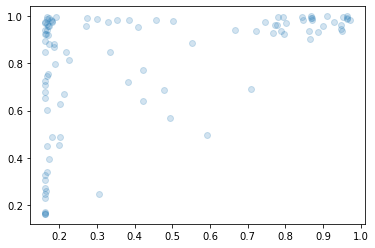

In [78]:
plt.scatter(entropy_dft,entropy_CGCNN,alpha=0.2)

In [79]:
np.corrcoef(entropy_dft,entropy_CGCNN)

array([[1.        , 0.46509296],
       [0.46509296, 1.        ]])

In [80]:
min(entropy_dft)

0.16315121970519145

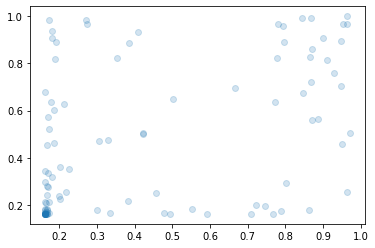

In [81]:
plt.scatter(entropy_dft,entropy_e3nn,alpha=0.2)

In [82]:
np.corrcoef(entropy_dft,entropy_e3nn)

array([[1.        , 0.45126334],
       [0.45126334, 1.        ]])

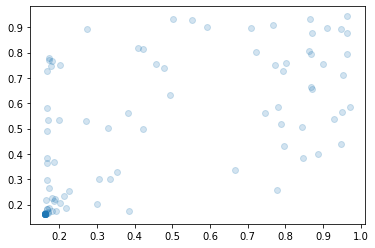

In [86]:
plt.scatter(entropy_dft,entropy_m3gnet,alpha=0.2)

In [87]:
np.corrcoef(entropy_dft,entropy_m3gnet)

array([[1.      , 0.635142],
       [0.635142, 1.      ]])

In [88]:
from sklearn import metrics

In [89]:
metrics.r2_score(entropy_dft,entropy_CGCNN)

-1.3138959269483248

In [90]:
metrics.r2_score(entropy_dft,entropy_e3nn)

-0.09501308517065943

In [91]:
metrics.r2_score(entropy_dft,entropy_m3gnet)

0.320270742712345

In [40]:
print(len(entropy_dft))

100


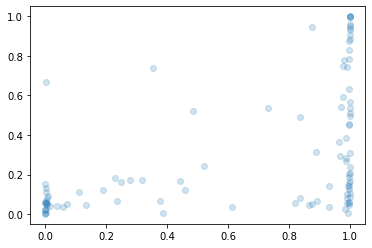

In [92]:
plt.scatter(Prs_dft,Prs_CGCNN,alpha=0.2)

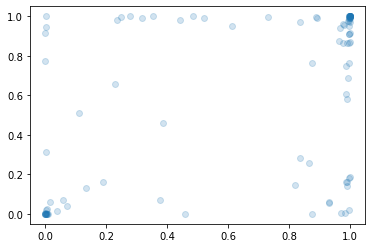

In [93]:
plt.scatter(Prs_dft,Prs_e3nn,alpha=0.2)

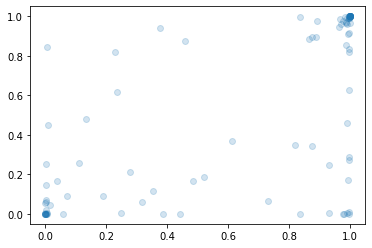

In [94]:
plt.scatter(Prs_dft,Prs_m3gnet,alpha=0.2)

In [95]:
metrics.r2_score(Prs_dft,Prs_CGCNN)

-0.4845345371765506

In [96]:
metrics.r2_score(Prs_dft,Prs_e3nn)

-0.006759561829188465

In [97]:
metrics.r2_score(Prs_dft,Prs_m3gnet)

0.2663014785523644

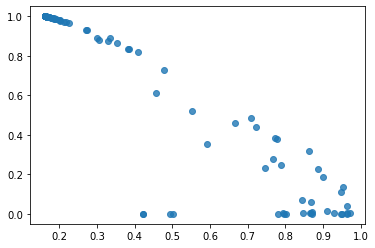

In [45]:
plt.scatter(entropy_dft,Prs_dft,alpha=0.8)

In [46]:
len(entropy_dft)

100

In [98]:
import json

with open('entropy_dft_held_out.json', 'w') as fp:
    json.dump(formula_to_entropy_dft, fp)

In [99]:
with open('entropy_CGCNN_held_out.json', 'w') as fp:
    json.dump(formula_to_entropy_CGCNN, fp)
    
with open('entropy_e3nn_held_out.json', 'w') as fp:
    json.dump(formula_to_entropy_e3nn, fp)
    
with open('entropy_m3gnet_held_out.json', 'w') as fp:
    json.dump(formula_to_entropy_m3gnet, fp)
    
with open('Prs_dft_held_out.json', 'w') as fp:
    json.dump(formula_to_Prs_dft, fp)
    
with open('Prs_CGCNN_held_out.json', 'w') as fp:
    json.dump(formula_to_Prs_CGCNN, fp)
    
with open('Prs_e3nn_held_out.json', 'w') as fp:
    json.dump(formula_to_Prs_e3nn, fp)
    
with open('Prs_m3gnet_held_out.json', 'w') as fp:
    json.dump(formula_to_Prs_m3gnet, fp)

In [32]:
tmp_df = held_out_B_data[held_out_B_data.formula == "La8Mn4O24Ti4"].copy()
tmp_df = tmp_df.sort_values(by=['unrelaxed_cryst_id'])

In [33]:
tmp_df

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,...,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull,e3nn_ensemble,CGCNN_ensemble
108,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448093,"{'@module': 'pymatgen.core.structure', '@class...",423433904,"{'@module': 'pymatgen.core.structure', '@class...",123030273,...,-8.471108,0.091005,-4.017920,"{'@module': 'pymatgen.core.structure', '@class...",-338.521973,-8.463049,108,0.106126,0.114892,0.109591
109,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448094,"{'@module': 'pymatgen.core.structure', '@class...",423481860,"{'@module': 'pymatgen.core.structure', '@class...",123052560,...,-8.481154,0.080959,-3.903905,"{'@module': 'pymatgen.core.structure', '@class...",-338.719513,-8.467988,109,0.108132,0.116005,0.107263
113,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448095,"{'@module': 'pymatgen.core.structure', '@class...",423463125,"{'@module': 'pymatgen.core.structure', '@class...",123051962,...,-8.482461,0.079652,-4.067067,"{'@module': 'pymatgen.core.structure', '@class...",-338.483093,-8.462077,113,0.105094,0.110735,0.107783
112,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448096,"{'@module': 'pymatgen.core.structure', '@class...",423464028,"{'@module': 'pymatgen.core.structure', '@class...",123052031,...,-8.495993,0.066120,-3.850542,"{'@module': 'pymatgen.core.structure', '@class...",-339.700989,-8.492525,112,0.104549,0.110231,0.108565
111,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448097,"{'@module': 'pymatgen.core.structure', '@class...",423434558,"{'@module': 'pymatgen.core.structure', '@class...",123030337,...,-8.499932,0.062180,-3.642347,"{'@module': 'pymatgen.core.structure', '@class...",-338.833038,-8.470826,111,0.099608,0.105433,0.108132
110,La8Mn4O24Ti4,LaMn0.500Ti0.500O3,"{'sites': {'A': ['La'], 'B': ['Mn', 'Ti'], 'X'...",40,40,261448098,"{'@module': 'pymatgen.core.structure', '@class...",423481534,"{'@module': 'pymatgen.core.structure', '@class...",123052488,...,-8.516502,0.045610,-2.894603,"{'@module': 'pymatgen.core.structure', '@class...",-340.560577,-8.514014,110,0.104897,0.114081,0.108680


In [34]:
formula_to_entropy_dft["La8Mn4O24Ti4"]

0.9043740497961864

In [35]:
formula_to_Prs_dft["La8Mn4O24Ti4"]

0.020494103589247265

In [100]:
discrete_dft_entropy = []
discrete_CGCNN_entropy = []
discrete_e3nn_entropy = []
discrete_m3gnet_entropy = []

discrete_dft_Prs = []
discrete_CGCNN_Prs = []
discrete_e3nn_Prs = []
discrete_m3gnet_Prs = []

for i in range(100):
    
    if entropy_dft[i] >0.5:
        discrete_dft_entropy.append(1.0)
    else:
        discrete_dft_entropy.append(0.0)
        
    if entropy_CGCNN[i] >0.5:
        discrete_CGCNN_entropy.append(1.0)
    else:
        discrete_CGCNN_entropy.append(0.0)
        
    if entropy_e3nn[i] >0.5:
        discrete_e3nn_entropy.append(1.0)
    else:
        discrete_e3nn_entropy.append(0.0)
        
    if entropy_m3gnet[i] >0.5:
        discrete_m3gnet_entropy.append(1.0)
    else:
        discrete_m3gnet_entropy.append(0.0)
        
        
        
    if Prs_dft[i] >0.5:
        discrete_dft_Prs.append(1.0)
    else:
        discrete_dft_Prs.append(0.0)
        
    if Prs_CGCNN[i] >0.5:
        discrete_CGCNN_Prs.append(1.0)
    else:
        discrete_CGCNN_Prs.append(0.0)
        
    if Prs_e3nn[i] >0.5:
        discrete_e3nn_Prs.append(1.0)
    else:
        discrete_e3nn_Prs.append(0.0)
        
    if Prs_m3gnet[i] >0.5:
        discrete_m3gnet_Prs.append(1.0)
    else:
        discrete_m3gnet_Prs.append(0.0)

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(discrete_dft_entropy,discrete_CGCNN_entropy)

array([[17, 48],
       [ 1, 34]])

In [103]:
confusion_matrix(discrete_dft_entropy,discrete_e3nn_entropy)

array([[47, 18],
       [11, 24]])

In [104]:
confusion_matrix(discrete_dft_entropy,discrete_m3gnet_entropy)

array([[47, 18],
       [ 6, 29]])

In [105]:
confusion_matrix(discrete_dft_Prs,discrete_CGCNN_Prs)

array([[34,  3],
       [39, 24]])

In [106]:
confusion_matrix(discrete_dft_Prs,discrete_e3nn_Prs)

array([[24, 13],
       [14, 49]])

In [107]:
confusion_matrix(discrete_dft_Prs,discrete_m3gnet_Prs)

array([[32,  5],
       [17, 46]])

In [111]:
from scipy.stats import spearmanr

In [127]:
held_out_B_data

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,...,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull,e3nn_ensemble,CGCNN_ensemble
0,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998128,"{'@module': 'pymatgen.core.structure', '@class...",423959398,"{'@module': 'pymatgen.core.structure', '@class...",123103556,...,-6.637245,0.074200,-1.389153,"{'@module': 'pymatgen.core.structure', '@class...",-266.711243,-6.667781,0,0.077370,0.075139,0.074035
1,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998125,"{'@module': 'pymatgen.core.structure', '@class...",421466237,"{'@module': 'pymatgen.core.structure', '@class...",122979400,...,-6.640676,0.070768,-1.420044,"{'@module': 'pymatgen.core.structure', '@class...",-266.456848,-6.661421,1,0.076950,0.074992,0.077533
2,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998126,"{'@module': 'pymatgen.core.structure', '@class...",421466235,"{'@module': 'pymatgen.core.structure', '@class...",122979657,...,-6.638568,0.072877,-1.424778,"{'@module': 'pymatgen.core.structure', '@class...",-266.213867,-6.655347,2,0.076547,0.074540,0.072869
3,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998127,"{'@module': 'pymatgen.core.structure', '@class...",421466263,"{'@module': 'pymatgen.core.structure', '@class...",122979417,...,-6.640780,0.070665,-1.404994,"{'@module': 'pymatgen.core.structure', '@class...",-264.671021,-6.616776,3,0.077123,0.074982,0.073774
4,Ca8Fe4Mn4O24,CaFe0.500Mn0.500O3,"{'sites': {'A': ['Ca'], 'B': ['Mn', 'Fe'], 'X'...",40,40,222998129,"{'@module': 'pymatgen.core.structure', '@class...",421466289,"{'@module': 'pymatgen.core.structure', '@class...",122979438,...,-6.640714,0.070731,-1.381979,"{'@module': 'pymatgen.core.structure', '@class...",-266.308624,-6.657716,4,0.077057,0.074879,0.072979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062436,"{'@module': 'pymatgen.core.structure', '@class...",421446419,"{'@module': 'pymatgen.core.structure', '@class...",122979607,...,-7.298675,0.083433,-1.855526,"{'@module': 'pymatgen.core.structure', '@class...",-289.953644,-7.248841,595,0.100901,0.105014,0.099033
596,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062439,"{'@module': 'pymatgen.core.structure', '@class...",421459053,"{'@module': 'pymatgen.core.structure', '@class...",122979241,...,-7.331892,0.050215,-1.358484,"{'@module': 'pymatgen.core.structure', '@class...",-290.115479,-7.252887,596,0.078920,0.079022,0.093835
597,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062435,"{'@module': 'pymatgen.core.structure', '@class...",421464614,"{'@module': 'pymatgen.core.structure', '@class...",122979281,...,-7.295573,0.086535,-1.938487,"{'@module': 'pymatgen.core.structure', '@class...",-291.638702,-7.290968,597,0.100350,0.108635,0.098116
598,Mn4Ni4O24Tb8,TbMn0.500Ni0.500O3,"{'sites': {'A': ['Tb'], 'B': ['Ni', 'Mn'], 'X'...",40,40,272062438,"{'@module': 'pymatgen.core.structure', '@class...",421446230,"{'@module': 'pymatgen.core.structure', '@class...",122979130,...,-7.307931,0.074177,-1.890348,"{'@module': 'pymatgen.core.structure', '@class...",-292.125397,-7.303135,598,0.089636,0.089832,0.098087


In [138]:
def get_spearmans(energy):
    spearmans = []
    for curr_form in held_out_B_data.formula:
        tmp_df = held_out_B_data[held_out_B_data.formula == curr_form].copy()
        dft_energies = np.asarray(tmp_df.dft_e_hull)
        model_energies = np.asarray(tmp_df[energy])
        spearmans.append(spearmanr(dft_energies,model_energies)[0])
        
    return np.asarray(spearmans)

In [139]:
CGCNN_spears = get_spearmans("CGCNN_ensemble")
e3nn_spears = get_spearmans("e3nn_ensemble")
m3gnet_spears = get_spearmans("M3Gnet_relaxed_energy_per_atom")

In [141]:
print(np.mean(CGCNN_spears))

0.4314285714285715


In [142]:
print(np.mean(e3nn_spears))

0.5691428571428572


In [143]:
print(np.mean(m3gnet_spears))

0.5308571428571429


In [150]:
held_out_series_e3nn_best = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_series_predictions.json")
held_out_series_e3nn_best_2 = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/holdout_set_series_predictions.json")
held_out_series_e3nn_best_3 = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/holdout_set_series_predictions.json")



In [146]:
held_out_series

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674840,"{'@module': 'pymatgen.core.structure', '@class...",421255705,"{'@module': 'pymatgen.core.structure', '@class...",122946754,-282.924004,-7.073100,0.155643,-3.706086,"{'@module': 'pymatgen.core.structure', '@class...",-281.835388,-7.045885,0,0.135469
1,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674829,"{'@module': 'pymatgen.core.structure', '@class...",421255754,"{'@module': 'pymatgen.core.structure', '@class...",122946790,-282.888155,-7.072204,0.156539,-3.393402,"{'@module': 'pymatgen.core.structure', '@class...",-282.413788,-7.060345,1,0.136587
2,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674850,"{'@module': 'pymatgen.core.structure', '@class...",423959399,"{'@module': 'pymatgen.core.structure', '@class...",123103557,-282.752910,-7.068823,0.159920,-3.692469,"{'@module': 'pymatgen.core.structure', '@class...",-281.959564,-7.048989,2,0.118276
3,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674832,"{'@module': 'pymatgen.core.structure', '@class...",421255719,"{'@module': 'pymatgen.core.structure', '@class...",122946765,-283.967819,-7.099195,0.129547,-3.652090,"{'@module': 'pymatgen.core.structure', '@class...",-281.792023,-7.044801,3,0.161031
4,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674834,"{'@module': 'pymatgen.core.structure', '@class...",423959434,"{'@module': 'pymatgen.core.structure', '@class...",123103586,-283.248998,-7.081225,0.147518,-3.559921,"{'@module': 'pymatgen.core.structure', '@class...",-281.422272,-7.035557,4,0.140187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674255,"{'@module': 'pymatgen.core.structure', '@class...",436520773,"{'@module': 'pymatgen.core.structure', '@class...",124467329,-250.368584,-6.259215,0.207065,-1.426689,"{'@module': 'pymatgen.core.structure', '@class...",-250.886169,-6.272154,858,0.193778
859,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674250,"{'@module': 'pymatgen.core.structure', '@class...",438904289,"{'@module': 'pymatgen.core.structure', '@class...",124881872,-250.311759,-6.257794,0.208486,-1.767277,"{'@module': 'pymatgen.core.structure', '@class...",-250.448029,-6.261201,859,0.227980
860,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674253,"{'@module': 'pymatgen.core.structure', '@class...",439756697,"{'@module': 'pymatgen.core.structure', '@class...",124917879,-249.768946,-6.244224,0.222056,-1.545788,"{'@module': 'pymatgen.core.structure', '@class...",-249.622391,-6.240560,860,0.212941
861,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674254,"{'@module': 'pymatgen.core.structure', '@class...",436520728,"{'@module': 'pymatgen.core.structure', '@class...",124467292,-249.766908,-6.244173,0.222107,-1.439217,"{'@module': 'pymatgen.core.structure', '@class...",-249.717239,-6.242931,861,0.207730


In [147]:
formula_count = {}
for curr_formula in held_out_series.formula:
    if curr_formula in formula_count:
        formula_count[curr_formula]+=1
    else:
        formula_count[curr_formula]=1

In [148]:
formula_count

{'Bi2Cu4La6Mo4O24': 19,
 'Bi4Cu4La4Mo4O24': 41,
 'Bi7Cu4La1Mo4O24': 6,
 'Co4Fe4La2O24Sr6': 25,
 'Co4Fe4La3O24Sr5': 24,
 'Co4Fe4La5O24Sr3': 12,
 'Co4Fe4La6O24Sr2': 17,
 'Co4Fe4La7O24Sr1': 3,
 'Co4Fe4La4O24Sr4': 30,
 'Bi3Cu4La5Mo4O24': 21,
 'Bi5Cu4La3Mo4O24': 16,
 'Bi6Cu4La2Mo4O24': 25,
 'Bi1Cu4La7Mo4O24': 4,
 'Co4Fe4La1O24Sr7': 6,
 'Al4Ba1K7O24Ti4': 5,
 'Al4Ba2K6O24Ti4': 26,
 'Al4Ba3K5O24Ti4': 24,
 'Al4Ba4K4O24Ti4': 50,
 'Al4Ba5K3O24Ti4': 26,
 'Al4Ba6K2O24Ti4': 26,
 'Al4Ba7K1O24Ti4': 6,
 'La1Ni4O24Pr7Y4': 6,
 'In4La1Mg4O24Y7': 6,
 'La2Ni4O24Pr6Y4': 24,
 'In4La2Mg4O24Y6': 24,
 'La3Ni4O24Pr5Y4': 24,
 'In4La3Mg4O24Y5': 26,
 'La4Ni4O24Pr4Y4': 43,
 'In4La4Mg4O24Y4': 51,
 'La5Ni4O24Pr3Y4': 7,
 'In4La5Mg4O24Y3': 26,
 'La6Ni4O24Pr2Y4': 18,
 'In4La6Mg4O24Y2': 24,
 'La7Ni4O24Pr1Y4': 2,
 'In4La7Mg4O24Y1': 6,
 'Mg1Ni4O24Pr7V4': 6,
 'Mg2Ni4O24Pr6V4': 25,
 'Mg3Ni4O24Pr5V4': 24,
 'Mg4Ni4O24Pr4V4': 51,
 'Mg5Ni4O24Pr3V4': 26,
 'Mg6Ni4O24Pr2V4': 26,
 'Mg7Ni4O24Pr1V4': 6}

In [ ]:
T = 1300
kb = 0.0000861733326


def get_Prs(data,formula,energies):
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    probs = np.exp(-energies/(kb*T))*degen
    probs = probs / probs.sum()
    
    return probs[-1]
    
    
    
def get_entropy(data,formula,energies):
    
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    Bolzmann_terms = np.exp(-energies/(kb*T))
    weighted_probs = Bolzmann_terms*degen / np.sum(Bolzmann_terms*degen)
    
    entropy = 0
    entropy_norm = 0
    
    Z = np.sum(Bolzmann_terms*degen)
    
    uniform_Bolzmann_terms = np.ones(Bolzmann_terms.shape)
    uniform_Z = np.sum(degen*uniform_Bolzmann_terms)
    uniform_weighted_probs = uniform_Bolzmann_terms*degen / uniform_Z

    for i in range(Bolzmann_terms.shape[0]):
        entropy += weighted_probs[i]*np.log(Bolzmann_terms[i]/Z)
        
        entropy_norm += uniform_weighted_probs[i]*np.log(uniform_Bolzmann_terms[i]/uniform_Z)

    return entropy/entropy_norm

In [149]:
def get_spearmans(energy):
    spearmans = []
    for curr_form in held_out_series.formula:
        tmp_df = held_out_series[held_out_series.formula == curr_form].copy()
        dft_energies = np.asarray(tmp_df.dft_e_hull)
        model_energies = np.asarray(tmp_df[energy])
        spearmans.append(spearmanr(dft_energies,model_energies)[0])
        
    return np.asarray(spearmans)

In [151]:
held_out_series_CGCNN_best = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_series_predictions.json")
held_out_series_CGCNN_best_2 = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/holdout_set_series_predictions.json")
held_out_series_CGCNN_best_3 = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/holdout_set_series_predictions.json")


In [152]:
held_out_series = held_out_series_e3nn_best.copy()

In [153]:
held_out_series_CGCNN_best

,formula,framework,composition,n_atoms_unrelaxed,n_atoms_opt,unrelaxed_cryst_id,unrelaxed_struct,opt_cryst_id,opt_struct,es_job_id,dft_energy,dft_energy_per_atom,dft_e_hull,Op_band_center,M3Gnet_relaxed_struct,M3Gnet_relaxed_energy,M3Gnet_relaxed_energy_per_atom,idx,predicted_dft_e_hull
0,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674840,"{'@module': 'pymatgen.core.structure', '@class...",421255705,"{'@module': 'pymatgen.core.structure', '@class...",122946754,-282.924004,-7.073100,0.155643,-3.706086,"{'@module': 'pymatgen.core.structure', '@class...",-281.835388,-7.045885,0,0.056025
1,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674829,"{'@module': 'pymatgen.core.structure', '@class...",421255754,"{'@module': 'pymatgen.core.structure', '@class...",122946790,-282.888155,-7.072204,0.156539,-3.393402,"{'@module': 'pymatgen.core.structure', '@class...",-282.413788,-7.060345,1,0.059529
2,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674850,"{'@module': 'pymatgen.core.structure', '@class...",423959399,"{'@module': 'pymatgen.core.structure', '@class...",123103557,-282.752910,-7.068823,0.159920,-3.692469,"{'@module': 'pymatgen.core.structure', '@class...",-281.959564,-7.048989,2,0.056567
3,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674832,"{'@module': 'pymatgen.core.structure', '@class...",421255719,"{'@module': 'pymatgen.core.structure', '@class...",122946765,-283.967819,-7.099195,0.129547,-3.652090,"{'@module': 'pymatgen.core.structure', '@class...",-281.792023,-7.044801,3,0.063143
4,Bi2Cu4La6Mo4O24,Bi0.250La0.750Cu0.500Mo0.500O3,"{'sites': {'A': ['Bi', 'La'], 'B': ['Cu', 'Mo'...",40,40,183674834,"{'@module': 'pymatgen.core.structure', '@class...",423959434,"{'@module': 'pymatgen.core.structure', '@class...",123103586,-283.248998,-7.081225,0.147518,-3.559921,"{'@module': 'pymatgen.core.structure', '@class...",-281.422272,-7.035557,4,0.054509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674255,"{'@module': 'pymatgen.core.structure', '@class...",436520773,"{'@module': 'pymatgen.core.structure', '@class...",124467329,-250.368584,-6.259215,0.207065,-1.426689,"{'@module': 'pymatgen.core.structure', '@class...",-250.886169,-6.272154,858,0.185309
859,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674250,"{'@module': 'pymatgen.core.structure', '@class...",438904289,"{'@module': 'pymatgen.core.structure', '@class...",124881872,-250.311759,-6.257794,0.208486,-1.767277,"{'@module': 'pymatgen.core.structure', '@class...",-250.448029,-6.261201,859,0.186397
860,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674253,"{'@module': 'pymatgen.core.structure', '@class...",439756697,"{'@module': 'pymatgen.core.structure', '@class...",124917879,-249.768946,-6.244224,0.222056,-1.545788,"{'@module': 'pymatgen.core.structure', '@class...",-249.622391,-6.240560,860,0.185592
861,Mg7Ni4O24Pr1V4,Mg0.875Pr0.125Ni0.500V0.500O3,"{'sites': {'A': ['Mg', 'Pr'], 'B': ['Ni', 'V']...",40,40,183674254,"{'@module': 'pymatgen.core.structure', '@class...",436520728,"{'@module': 'pymatgen.core.structure', '@class...",124467292,-249.766908,-6.244173,0.222107,-1.439217,"{'@module': 'pymatgen.core.structure', '@class...",-249.717239,-6.242931,861,0.184355


In [155]:
CGCNN_ensemble = (1/3.0)*(held_out_series_CGCNN_best.predicted_dft_e_hull + held_out_series_CGCNN_best_2.predicted_dft_e_hull+held_out_series_CGCNN_best_3.predicted_dft_e_hull)

In [154]:
e3nn_ensemble = (1/3.0)*(held_out_series_e3nn_best.predicted_dft_e_hull + held_out_series_e3nn_best_2.predicted_dft_e_hull+held_out_series_e3nn_best_3.predicted_dft_e_hull)

In [156]:
held_out_series["CGCNN_ensemble"]=CGCNN_ensemble
held_out_series["e3nn_ensemble"]=e3nn_ensemble


In [157]:
CGCNN_spears = get_spearmans("CGCNN_ensemble")
e3nn_spears = get_spearmans("e3nn_ensemble")
m3gnet_spears = get_spearmans("M3Gnet_relaxed_energy_per_atom")

In [158]:
print(np.mean(CGCNN_spears))

-0.0715209841913381


In [159]:
print(np.mean(e3nn_spears))

-0.006170076199353717


In [160]:
print(np.mean(m3gnet_spears))

0.2658840634921452


In [168]:
import json 
   
# Opening JSON file 
f = open('AABBO3_degeneracy.json',) 
   
# returns JSON object as  
# a dictionary 
degen_quad = json.load(f) 
   
f.close() 

In [172]:
degen_quad

{'A(7:1)_B(7:1)_O24': {'0': 64},
 'A(7:1)_B(6:2)_O24': {'0': 96, '1': 96, '2': 32},
 'A(7:1)_B(5:3)_O24': {'0': 192, '1': 192, '2': 64},
 'A(7:1)_B(4:4)_O24': {'0': 48, '1': 64, '2': 192, '3': 192, '4': 48, '5': 16},
 'A(6:2)_B(7:1)_O24': {'0': 96, '1': 96, '2': 32},
 'A(6:2)_B(6:2)_O24': {'0': 48,
  '1': 96,
  '2': 96,
  '3': 48,
  '4': 48,
  '5': 96,
  '6': 48,
  '7': 48,
  '8': 96,
  '9': 48,
  '10': 48,
  '11': 48,
  '12': 16},
 'A(6:2)_B(5:3)_O24': {'0': 192,
  '1': 96,
  '2': 96,
  '3': 192,
  '4': 96,
  '5': 96,
  '6': 192,
  '7': 192,
  '8': 96,
  '9': 96,
  '10': 96,
  '11': 96,
  '12': 32},
 'A(6:2)_B(4:4)_O24': {'0': 48,
  '1': 96,
  '2': 96,
  '3': 192,
  '4': 192,
  '5': 24,
  '6': 24,
  '7': 96,
  '8': 48,
  '9': 24,
  '10': 24,
  '11': 96,
  '12': 192,
  '13': 96,
  '14': 48,
  '15': 96,
  '16': 192,
  '17': 48,
  '18': 24,
  '19': 24,
  '20': 24,
  '21': 32,
  '22': 96,
  '23': 96,
  '24': 24,
  '25': 8},
 'A(5:3)_B(7:1)_O24': {'0': 192, '1': 192, '2': 64},
 'A(5:3)_B(6

In [207]:
from pymatgen.core import Structure

from pymatgen.analysis.structure_matcher import StructureMatcher
SM = StructureMatcher()

from repos.pykite.pykite.structure.builder import PerovskiteBuilder
from repos.pykite.pykite.structure.perovskite import Perovskite
from pymatgen.core import Composition

In [228]:
def get_parent_degens(data_form_sorted):
    formula = data_form_sorted.formula
    
    As = data_form_sorted.iloc[0].composition["sites"]["A"]
    big_num = int(max(data_form_sorted.iloc[0].composition["composition"][As[0]],data_form_sorted.iloc[0].composition["composition"][As[1]]))
    small_num = 8 - big_num
    big_num = str(big_num)
    small_num = str(small_num)
    sub_name = big_num+":"+small_num
    name = 'A(' + sub_name + ')_B(4:4)_O24'
    
    return list(degen_quad[name].values())

def get_parent_structs(data_form_sorted):
    
    

    Acomp = ""
    As = data_form_sorted.iloc[0].composition["sites"]["A"]
    
    for Asite in As:
        Acomp+=Asite
        Acomp+=str(data_form_sorted.iloc[0].composition["composition"][Asite])
    Acomp = Composition(Acomp)
    Bcomp = ""
    Bs = data_form_sorted.iloc[0].composition["sites"]["B"]
    for Bsite in Bs:
        Bcomp+=Bsite
        Bcomp+=str(data_form_sorted.iloc[0].composition["composition"][Bsite])
    Bcomp = Composition(Bcomp)
    Oxy = Composition("O24")
    #print(Acomp)
    #print(Bcomp)
    perovskite_prototype = Perovskite(Acomp,Bcomp,Oxy)
    builder = PerovskiteBuilder(perovskite_prototype)
    
    
    return builder.build_structures()


def get_unrelaxed_index(parent_structs,unrelaxed_struct):
    
    tmp_struct = Structure.from_dict(unrelaxed_struct)
    for i in range(len(parent_structs)):
        if SM.get_rms_dist(tmp_struct,parent_structs[i]) != None:
            return i
        
        
    
    
    

In [229]:
def get_series_entropy(data,formula,energies):
    
    data_form = data[data.formula==formula].copy()
    data_form_sorted = data_form.sort_values(by=["unrelaxed_cryst_id"],axis=0)
    #print(formula)
    ### Get Parent Degens
    parent_degens = get_parent_degens(data_form_sorted)
    #print(len(parent_degens))
    ### Make Parent Unrelaxed
    parent_structs = get_parent_structs(data_form_sorted)
    #print(len(parent_structs))
    ### Get matching
    degen_selected = []
    for unrelaxed_struct in data_form_sorted.unrelaxed_struct:
        degen_selected.append(parent_degens[get_unrelaxed_index(parent_structs,unrelaxed_struct)])
    
    degen_selected = np.asarray(degen_selected)

    energies = np.asarray(data_form_sorted[energies])*40.0
    energies -= energies.min()
    Bolzmann_terms = np.exp(-energies/(kb*T))
    weighted_probs = Bolzmann_terms*degen_selected / np.sum(Bolzmann_terms*degen_selected)
    
    entropy = 0
    entropy_norm = 0
    
    Z = np.sum(Bolzmann_terms*degen_selected)
    
    uniform_Bolzmann_terms = np.ones(Bolzmann_terms.shape)
    uniform_Z = np.sum(degen_selected*uniform_Bolzmann_terms)
    uniform_weighted_probs = uniform_Bolzmann_terms*degen_selected / uniform_Z

    for i in range(Bolzmann_terms.shape[0]):
        entropy += weighted_probs[i]*np.log(Bolzmann_terms[i]/Z)
        
        entropy_norm += uniform_weighted_probs[i]*np.log(uniform_Bolzmann_terms[i]/uniform_Z)

    return entropy/entropy_norm

In [232]:
formula_to_entropy_dft_series = {}
formula_to_entropy_CGCNN_series = {}
formula_to_entropy_e3nn_series = {}
formula_to_entropy_m3gnet_series = {}

In [237]:
for formula in set(held_out_series.formula):
    formula_to_entropy_dft_series[formula] = get_series_entropy(held_out_series.copy(),formula,"dft_e_hull")
    formula_to_entropy_CGCNN_series[formula] = get_series_entropy(held_out_series.copy(),formula,"CGCNN_ensemble")
    formula_to_entropy_e3nn_series[formula] = get_series_entropy(held_out_series.copy(),formula,"e3nn_ensemble")
    formula_to_entropy_m3gnet_series[formula] = get_series_entropy(held_out_series.copy(),formula,"M3Gnet_relaxed_energy_per_atom")

In [238]:
entropy_series_dft = list(formula_to_entropy_dft_series.values())
entropy_series_CGCNN = list(formula_to_entropy_CGCNN_series.values())
entropy_series_e3nn = list(formula_to_entropy_e3nn_series.values())
entropy_series_m3gnet = list(formula_to_entropy_m3gnet_series.values())

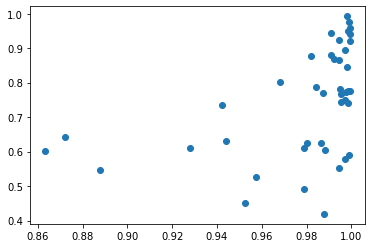

In [239]:
plt.scatter(entropy_series_CGCNN,entropy_series_dft)

In [240]:
metrics.r2_score(entropy_series_CGCNN,entropy_series_dft)

-66.84756543205033

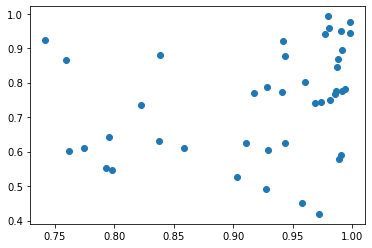

In [241]:
plt.scatter(entropy_series_e3nn,entropy_series_dft)

In [242]:
metrics.r2_score(entropy_series_e3nn,entropy_series_dft)

-7.931646970567437

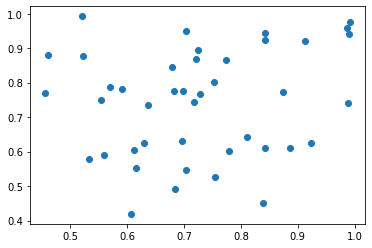

In [243]:
plt.scatter(entropy_series_m3gnet,entropy_series_dft)

In [244]:
metrics.r2_score(entropy_series_m3gnet,entropy_series_dft)

-0.7927463289924193